In [24]:
import os
import numpy as np
import pandas as pd
from ModelTraining.dataimport import CSVImport
import Utilities.file_utilities as file_utils
import ModelTraining.Utilities.Plotting.plot_data as plt_utils
import Utilities.signal_processing_utils as sigutils
import matplotlib.pyplot as plt

In [36]:
if __name__=="__main__":
    # File paths
    hybridcosim_path = os.environ.get("HYBRIDCOSIM_REPO_PATH", "../../")
    csv_file_path = os.path.join(hybridcosim_path, "Data/AEE/Resampled15min")
    fig_save_path = os.path.join(hybridcosim_path, "DataAnalysis","DataProcessingAEE","Solarhouse1","Figures")
    file_utils.create_dir(fig_save_path)
    # Read data
    data_import = CSVImport(freq='15T', sep=";", index_col="Zeitraum")
    df = data_import.import_data(csv_file_path)

In [22]:
    # Add additional columns
    Psolarbuffer = df['PSolar']*np.logical_xor(df['GSolarPufferPool'],1).astype(int)
    Psolarpool = df['PSolar']*df['GSolarPufferPool']*(df['TSolarVL']>df['TSolarRL'])
    Psolarbufferrest = (df['PSolar']*df['GSolarPufferPool'] - (df['TSolarVL']-df['TSchwimmbadRL'])*df['VDSchwimmbad']*1.16/1000).clip(lower=0)
    df["PSolarPuffer"] = Psolarbuffer
    df["PSolarPool"] = Psolarpool
    df["PSolarPufferRest"] = Psolarbufferrest


In [ ]:
    ### Plot Switches
    switchesList = ['PuSolarKoll','PuSolar','GSolarPufferPool','PuPool','PuPufferPool','PuHolzkessel']
    subplot_data = [df[[switch]] for switch in switchesList]
    plt_utils.plot_df_subplots(df[switchesList], fig_save_path=fig_save_path,fig_title='Switches', figsize=(10,10))

In [ ]:
    # Lists of curves
    list_P = ['PSolar', 'PSolarPuffer', 'PSolarPool', 'PSolarPufferRest']
    storage_tank_temperatures = ['TPuffero', 'TPuffermo', 'TPuffermu', 'TPufferu']
    heatpump_temperatures = ['TWPVL', 'TWPRL']
    oven_temperatures=['TVLOfenn', 'TOfenVL', 'TOfenRL']
    pool_temperatures = ['TSchwimmbadVL', 'TSchwimmbadRL']
    floor_heating_temperatures = ['TFBHVL', 'TFBHRL']
    floor_heating_temperatures_n = ['TFBHVLn', 'TFBHRLn']
    solar_temperatures=['TSolarVLpri','TSolarRLpri','TSolarVL','TSolarRL']

In [ ]:
    data_1 = [plt_utils.rename_columns(df[['SGlobal']],['Global solar radiation']), plt_utils.rename_columns(df[['PuSolarKoll','PuSolar','GSolarPufferPool']],['Primary Pump Solar', 'Secondary Pump Solar', 'Valve Solar Puffer Pool'])]
    data_2 = df[solar_temperatures]
    data_3 = [plt_utils.rename_columns(df[['PSolar']],['Solar Power']) ,  plt_utils.rename_columns(df[['VDSolar']], ['Solar Volume Flow'])]
    data_4 = [df[storage_tank_temperatures], plt_utils.rename_columns(df[['PuPufferPool']],["Pump from Puffer to Pool"])]
    data_5 = df[list_P]
    plt_utils.plt_subplots([data_1,data_2, data_3, data_4, data_5],fig_save_path=fig_save_path, fig_title="House", linestyle="--", figsize=(10,10),show_ylabel=False)


In [ ]:
    data_1 = [plt_utils.rename_columns(df[['VDSolar']], ['Solar Volume Flow'])]
    data_2 = [plt_utils.rename_columns(df[['VDSolar']][0:2000], ['Solar Volume Flow - Excerpt'])]
    plt_utils.plt_subplots([data_1,data_2],fig_save_path=fig_save_path, fig_title="Solar Volume Flow", linestyle="--", figsize=(15,5),show_ylabel=True, show_legend=False)
    percentage = np.sum(df['VDSolar'] > 0) / df.shape[0]
    vd_vals  = df['VDSolar'].where(df['VDSolar'] > 0)
    stdev = np.nanstd(vd_vals)
    median = np.nanmedian(vd_vals)
    mean = np.nanmean(vd_vals)
    print(np.nanmin(vd_vals))
    print(np.nanmax(vd_vals))
    print(median)
    print(mean)
    print(stdev)
    print(percentage)

In [ ]:
    data_1 = [plt_utils.rename_columns(df[['TSolarVL','TSolarRL']][int(0.8*df.shape[0]):df.shape[0]], ['Solar Supply Temperature', 'Solar Return Temperature'])]
    data_2 = [plt_utils.rename_columns(df[['SGlobal']][int(0.8*df.shape[0]):df.shape[0]], ['Solar Radiation'])]


    plt_utils.plt_subplots([data_1, data_2],fig_save_path=fig_save_path, fig_title="Solar Collector", linestyle="--", figsize=(15,5),show_ylabel=False)
    percentage = np.sum(df['VDSolar'] > 0) / df.shape[0]

    vd_vals  = df['VDSolar'].where(df['VDSolar'] > 0)
    stdev = np.nanstd(vd_vals)
    median = np.nanmedian(vd_vals)
    mean = np.nanmean(vd_vals)
    print(np.nanmin(vd_vals))
    print(np.nanmax(vd_vals))
    print(median)
    print(mean)
    print(stdev)
    print(percentage)




In [ ]:
    # Heat Pump
    data = [[df[heatpump_temperatures]],  [plt_utils.rename_columns(df[['PWP']],["Heat Pump Power"]),plt_utils.rename_columns(df[['VDWP']],["Heat Pump Volume flow"])], [plt_utils.rename_columns(df[['QStromWP']],['Heat Pump Energy Consumption'])]]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title="Heat Pump Part", linestyle="--", figsize=(10,10),show_ylabel=False)

In [ ]:
    # Storage, Oven
    data = [[df[storage_tank_temperatures]], [df[oven_temperatures]], [plt_utils.rename_columns(df[['PuPufferPool']],["Pump from storage tank to pool"]),plt_utils.rename_columns(df[['GSolarPufferPool']],["Switch from storage tank to pool"])]]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title="Storage and Oven", linestyle="--", figsize=(10,10),show_ylabel=False)

In [ ]:
    # Pool
    data = [[plt_utils.rename_columns(df[['GSolarPufferPool']],["Pump from storage tank to pool"]),plt_utils.rename_columns(df[['PuPufferPool']],["Switch from storage tank to pool"])],
            [df[pool_temperatures], df[["VDSchwimmbad"]]], [df[['TSchwimmbadRaum']],df[['VDSchwimmbad']]]]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title="Pool Part", linestyle="--", figsize=(10,10),show_ylabel=False)

In [ ]:
    # Floor Heating
    switches_house = ['PuSolarKoll', 'PuSolar', 'GSolarPufferPool']
    data = [[df[floor_heating_temperatures]], [df[floor_heating_temperatures_n]],
            [plt_utils.rename_columns(df[['PuFBH']], ["Pump Floor Heating"])],
            [plt_utils.rename_columns(df[['QStromHaus']],["Floor Heating Energy Consumption"])], [df[switches_house]]]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title="Floor Heating", linestyle="--", figsize=(10,10),show_ylabel=False)

In [ ]:
    # Warm water
    data = [[plt_utils.rename_columns(df[['Wasserzaehler']],['Water Consumption - Cumulative']) ], [plt_utils.rename_columns(df[['QWW']],["Hot Water Energy Consumption - Cumulative"])]]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title="House - Hot Water", linestyle="--", figsize=(10,10),show_ylabel=False)

In [ ]:
    # Return temperatures
    return_temperatures = ["TOfenRL", "TWPRL", "TPufferu"]
    legends_return = ["Oven Return", "Heat Pump Return","Puffer bottom temperature"]
    top_temperatures = ["TOfenVL", "TWPVL","TSolarVL", "TFBHVL","TPuffero"]
    legends_supply = ["Oven Supply", "Heat Pump Supply", "Solar Supply", "Floor Heating Supply", "Puffer top temperature"]
    data = [[plt_utils.rename_columns(df[return_temperatures], legends_return)], [plt_utils.rename_columns(df[top_temperatures], legends_supply)]]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title='Return Temperatures', linestyle="--", figsize=(10,10),show_ylabel=False)

In [ ]:
    df["DeltaTFloorHeating"] = df["TFBHVL"] - df["TFBHRL"]
    df["DeltaTHeatPump"] = df["TWPVL"] - df["TWPRL"]
    df["DeltaTOven"] = df["TOfenVL"] - df["TOfenRL"]
    df["DeltaTPool"] = df['TSchwimmbadVL'] - df['TSchwimmbadRL']
    df["DeltaTSolar"] = df['TSolarVL'] - df['TSolarRL']
    data = [df[[deltaT]] for deltaT in ['DeltaTSolar', 'DeltaTFloorHeating', 'DeltaTHeatPump', 'DeltaTOven', 'DeltaTPool']]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title='Temperature Differences - Spatial - Components', linestyle="--", figsize=(10,10),show_ylabel=True)

In [ ]:
    df['deltaT1'] = df['TPuffero'] - df['TPuffermo']
    df['deltaT2'] = df['TPuffermo'] - df['TPuffermu']
    df['deltaT3'] = df['TPuffermu'] - df['TPufferu']
    df['deltaT'] = df['TPuffero'] - df['TPufferu']
    labels = ['deltaT1', 'deltaT2', 'deltaT3', 'deltaT']
    data = [df[[deltaT]] for deltaT in labels]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title='Temperature Differences - Spatial - Storage Tank', linestyle="--", figsize=(10,10),show_ylabel=True)

In [ ]:
    df['deltaT_TPuffero'] = sigutils.diff(df['TPuffero'])
    df['deltaT_TPuffermo'] = sigutils.diff(df['TPuffermo'])
    df['deltaT_TPuffermu'] = sigutils.diff(df['TPuffermu'])
    df['deltaT_TPufferu'] = sigutils.diff(df['TPufferu'])
    labels = [['deltaT_TPuffero'], ['deltaT_TPuffermo'],['deltaT_TPuffermu'],['deltaT_TPufferu']]
    data = [df[label] for label in labels]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title='Temperature Differences - Time - Storage Tank', linestyle="--", figsize=(10,10),show_ylabel=True)

In [ ]:
    df['deltaT_T12'] = sigutils.diff(df['deltaT1'])
    df['deltaT_T23'] = sigutils.diff(df['deltaT2'])
    df['deltaT_T34'] = sigutils.diff(df['deltaT3'])
    df['deltaT_T14'] = sigutils.diff(df['deltaT'])
    labels = [['deltaT_T12'], ['deltaT_T23'],['deltaT_T34'],['deltaT_T14']]
    data = [df[label] for label in labels]
    plt_utils.plt_subplots(data,fig_save_path=fig_save_path, fig_title='Temperature Differences - Time and Spatial - Storage Tank', linestyle="--", figsize=(10,10),show_ylabel=True)

In [ ]:
    plt_utils.plt_subplots([df[['SGlobal']]],fig_save_path=fig_save_path, fig_title='SGlobal', linestyle="--", figsize=(10,10),show_ylabel=True)


In [ ]:
    def get_mean_over_time_ranges(data, time):
        import numpy as np
        return [np.mean(data[curtime[0]:curtime[1]].values) for curtime in time]

    def get_vals_in_hour_range(data, hours):
        return data[data.index.hour.isin(hours)]


    import pandas as pd
    from pandas.tseries.offsets import MonthEnd
    time = [[pd.Timestamp(2019,month,1),pd.Timestamp(2019,month,1) + MonthEnd(1)] for month in range(2,12)]
    print(time)
    TSolarVL = df[['TSolarVL']]

    import matplotlib.pyplot as plt
    import numpy as np
    hours = list(range(6)) + list(range(18,24))
    # TODO improve this code!
    df['Mean night value'] = np.zeros((df.shape[0]))
    means = get_mean_over_time_ranges(get_vals_in_hour_range(TSolarVL, hours), time)
    for curtime, mean in zip(time, means):
        df['Mean night value'][curtime[0]:curtime[1]] = mean
    print(np.mean(means))
    plt_utils.plt_subplots([TSolarVL[curtime[0]:curtime[1]].join(df[['Mean night value']][curtime[0]:curtime[1]]) for curtime in time],fig_save_path=fig_save_path, fig_title= 'Seasonal Trend', linestyle="--", figsize=(15,15),show_ylabel=True, ylim=(25,65))

In [ ]:
    print(f'Stddev:{np.std(means)}, Mean: {np.mean(means)}')
    plt.figure()
    plt.stem(means)
    plt.ylabel('Mean night temperature')
    plt.xticks(range(9))
    plt.xlabel('Month')
    plt.show()

In [ ]:
    deltaT = df[['DeltaTSolar']]
    means = get_mean_over_time_ranges(get_vals_in_hour_range(deltaT, hours), time)
    df['DeltaT Mean night value'] = np.zeros((df.shape[0]))
    for curtime, mean in zip(time, means):
        df['DeltaT Mean night value'][curtime[0]:curtime[1]] = mean

    plt_utils.plt_subplots([deltaT[curtime[0]:curtime[1]].join(df[['DeltaT Mean night value']]) for curtime in time],fig_save_path=fig_save_path, fig_title= 'Seasonal Trend', linestyle="--", figsize=(15,15),show_ylabel=True)

In [ ]:
    print(f'Stddev:{np.std(means)}, Mean: {np.mean(means)}')
    plt.figure()
    plt.stem(means)
    plt.ylabel('Mean night temperature')
    plt.xticks(range(9))
    plt.xlabel('Month')
    plt.show()


Index(['SGlobal', 'TKoll', 'TSolarVLpri', 'TSolarRLpri', 'TVLOfenn',
       'TPuffero', 'TPuffermo', 'TPuffermu', 'TPufferu', 'TFBHVLn', 'TFBHRLn',
       'THallenbadWasser', 'TWhirlpoolWasser', 'TVLSchwimmbad',
       'TRLSchwimmbad', 'TAussen', 'FRelAussen', 'TSommergarten', 'QWW',
       'TEssen', 'FRelEssen', 'TSchwimmbadRaum', 'FrelSchwimmbadRaum',
       'Wasserzaehler', 'PuSolarKoll', 'PuSolar', 'GSolarPufferPool',
       'PuHolzkessel', 'PuPufferPool', 'PuPool', 'GPoolWhirlpool',
       'GMischFBHA', 'GMischFBHB', 'PuFBH', 'GWohnen', 'GSommergarten',
       'PuZirkulation', 'QStromHaus', 'QStromWP', 'QStromTechnik',
       'TSchlafzimmer', 'TArbeitszimmer', 'TKinderzimmer', 'TGarage',
       'GSchlafzimmer', 'GArbeitszimmer', 'GKinderzimmer', 'GGarage',
       'GBadezimmer', 'TOfenVL', 'TOfenRL', 'VDOfen', 'POfen', 'QOfen',
       'TSchwimmbadVL', 'TSchwimmbadRL', 'VDSchwimmbad', 'PSchwimmbad',
       'QSchwimmbad', 'TWPVL', 'TWPRL', 'VDWP', 'PWP', 'QWP', 'TFBHVL',
       'TFBH

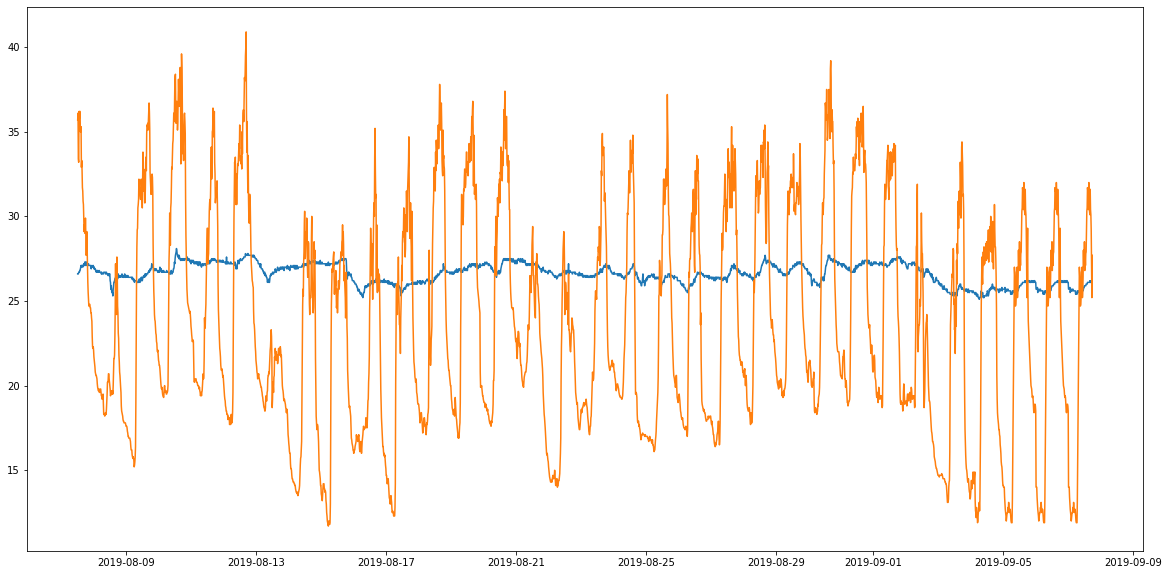

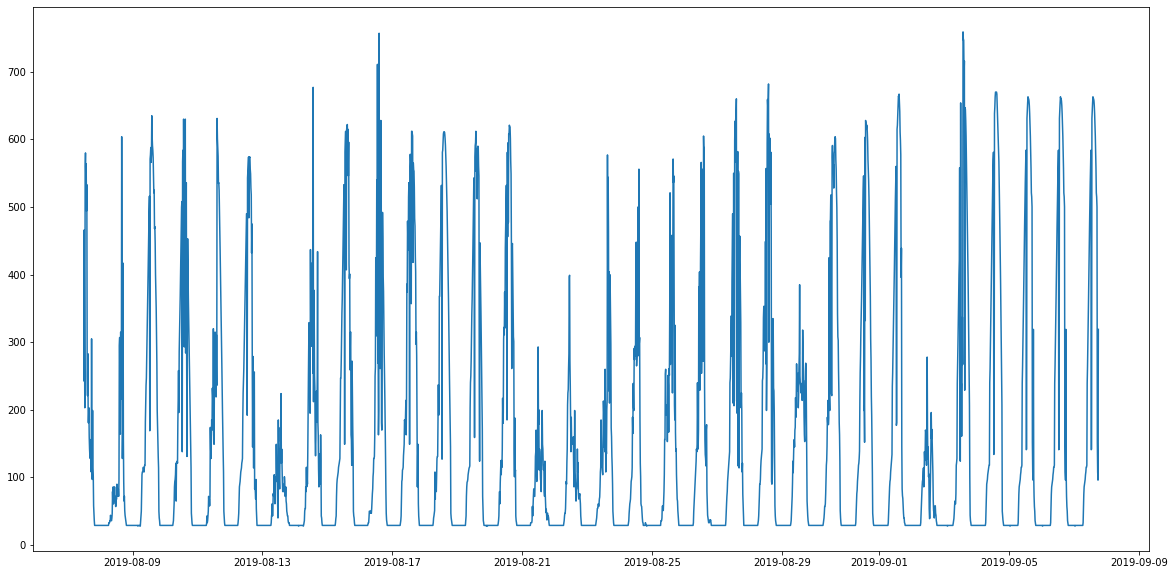

In [42]:
    print(df.columns)
    plt.figure(figsize=(20,10))
    plt.plot(df['TArbeitszimmer'][18000:21000])
    plt.plot(df['TAussen'][18000:21000])
    #plt.plot(df['TAussen'])
    plt.show()
    plt.figure(figsize=(20,10))
    plt.plot(df['SGlobal'][18000:21000])
    plt.show()